In [1]:
from chebgreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebgreen.chebpy2 import Quasimatrix
from chebgreen.chebpy2.chebpy import chebfun
from chebgreen.chebpy2 import Chebfun2

Loading settings from /home/hp447/chebgreen/examples/settings.ini.

ChebGreen settings:
[MATLAB]
nsample = 100
lambda = 0.01
nf = 500
nu = 500
noise = 0.0

[GREENLEARNING]
trainratio = 0.95
epochs_adam = 2000
epochs_lbfgs = 0
initlearningrate = 0.01
finallearningrate = 0.001
layerconfig = [50,50,50,50]
activation = rational

[GENERAL]
precision = 64
device = cuda:1

MATLAB Path = /usr/local/MATLAB/R2024b/bin/matlab
PyTorch device = cuda:1


In [2]:
%%time
Theta = [1.0,2.0,3.0]
theta_ = 2.5
domain = [-1,1,-1,1]
generateData = True
script = "generate_example"
example = "advection_diffusion"
dirichletBC = True

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 11.7 μs


In [3]:

model = ChebGreen(Theta, domain, generateData, script, example, dirichletBC)

Generating dataset for example 'advection_diffusion'


### Example = advection_diffusion @ theta = 1 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/100
Step = 58/100
Step = 59/100
Step = 60/100
Step = 61/1

### Example = advection_diffusion @ theta = 2 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/100
Step = 58/100
Step = 59/100
Step = 60/100
Step = 61/1

### Example = advection_diffusion @ theta = 3 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/100
Step = 58/100
Step = 59/100
Step = 60/100
Step = 61/1

-------------------------------------------------------------------------------

Generating chebfun2 models:


Training greenlearning model for example 'advection_diffusion' at Theta = 1.00


Training with Adam:


Loss at epoch 100: Training = 2.102E-03, Validation = 2.391E-03


Loss at epoch 200: Training = 4.448E-04, Validation = 5.461E-04


Loss at epoch 300: Training = 2.222E-04, Validation = 2.460E-04


Loss at epoch 400: Training = 1.571E-04, Validation = 1.698E-04


Loss at epoch 500: Training = 1.121E-04, Validation = 1.192E-04


Loss at epoch 600: Training = 1.523E-04, Validation = 8.886E-05


Loss at epoch 700: Training = 6.724E-05, Validation = 7.171E-05


Loss at epoch 800: Training = 5.399E-05, Validation = 5.850E-05


Loss at epoch 900: Training = 4.465E-05, Validation = 4.930E-05


Loss at epoch 1000: Training = 3.786E-05, Validation = 4.266E-05


Loss at epoch 1100: Training = 3.285E-05, Validation = 3.774E-05


Loss at epoch 1200: Training = 2.908E-05, Validation = 3.398E-05


Loss at epoch 1300: Training = 2.617E-05, Validation = 3.101E-05


Loss at epoch 1400: Training = 2.387E-05, Validation = 2.861E-05


Loss at epoch 1500: Training = 2.202E-05, Validation = 2.663E-05


Loss at epoch 1600: Training = 2.050E-05, Validation = 2.500E-05


Loss at epoch 1700: Training = 1.923E-05, Validation = 2.363E-05


Loss at epoch 1800: Training = 1.817E-05, Validation = 2.248E-05


Loss at epoch 1900: Training = 1.727E-05, Validation = 2.152E-05


Loss at epoch 2000: Training = 1.650E-05, Validation = 2.069E-05
Training with LBFGS:


Learning a chebfun model for example 'advection_diffusion' at Theta = 1.00


Chebfun model added for example 'advection_diffusion' at Theta = 1.00

Training greenlearning model for example 'advection_diffusion' at Theta = 2.00
Training with Adam:


Loss at epoch 100: Training = 1.162E-03, Validation = 1.221E-03


Loss at epoch 200: Training = 4.689E-04, Validation = 4.751E-04


Loss at epoch 300: Training = 2.102E-04, Validation = 2.252E-04


Loss at epoch 400: Training = 3.389E-04, Validation = 3.268E-04


Loss at epoch 500: Training = 6.891E-05, Validation = 7.092E-05


Loss at epoch 600: Training = 4.948E-05, Validation = 4.928E-05


Loss at epoch 700: Training = 3.825E-05, Validation = 3.789E-05


Loss at epoch 800: Training = 3.106E-05, Validation = 3.127E-05


Loss at epoch 900: Training = 6.369E-05, Validation = 2.967E-05


Loss at epoch 1000: Training = 2.329E-05, Validation = 2.507E-05


Loss at epoch 1100: Training = 2.062E-05, Validation = 2.305E-05


Loss at epoch 1200: Training = 1.860E-05, Validation = 2.155E-05


Loss at epoch 1300: Training = 1.703E-05, Validation = 2.036E-05


Loss at epoch 1400: Training = 1.577E-05, Validation = 1.940E-05


Loss at epoch 1500: Training = 1.474E-05, Validation = 1.860E-05


Loss at epoch 1600: Training = 1.389E-05, Validation = 1.791E-05


Loss at epoch 1700: Training = 1.317E-05, Validation = 1.730E-05


Loss at epoch 1800: Training = 1.256E-05, Validation = 1.677E-05


Loss at epoch 1900: Training = 1.203E-05, Validation = 1.630E-05


Loss at epoch 2000: Training = 1.157E-05, Validation = 1.587E-05
Training with LBFGS:


Learning a chebfun model for example 'advection_diffusion' at Theta = 2.00


Chebfun model added for example 'advection_diffusion' at Theta = 2.00

Training greenlearning model for example 'advection_diffusion' at Theta = 3.00
Training with Adam:


Loss at epoch 100: Training = 3.303E-03, Validation = 3.692E-03


Loss at epoch 200: Training = 4.864E-04, Validation = 6.596E-04


Loss at epoch 300: Training = 2.917E-04, Validation = 3.279E-04


Loss at epoch 400: Training = 2.185E-04, Validation = 2.424E-04


Loss at epoch 500: Training = 1.629E-04, Validation = 1.907E-04


Loss at epoch 600: Training = 1.193E-04, Validation = 1.458E-04


Loss at epoch 700: Training = 9.213E-05, Validation = 1.153E-04


Loss at epoch 800: Training = 7.871E-05, Validation = 9.835E-05


Loss at epoch 900: Training = 6.597E-05, Validation = 8.551E-05


Loss at epoch 1000: Training = 5.817E-05, Validation = 7.779E-05


Loss at epoch 1100: Training = 5.261E-05, Validation = 7.350E-05


Loss at epoch 1200: Training = 4.760E-05, Validation = 6.852E-05


Loss at epoch 1300: Training = 4.347E-05, Validation = 6.464E-05


Loss at epoch 1400: Training = 3.994E-05, Validation = 6.118E-05


Loss at epoch 1500: Training = 3.689E-05, Validation = 5.804E-05


Loss at epoch 1600: Training = 3.425E-05, Validation = 5.517E-05


Loss at epoch 1700: Training = 3.905E-05, Validation = 5.224E-05


Loss at epoch 1800: Training = 3.007E-05, Validation = 5.060E-05


Loss at epoch 1900: Training = 2.835E-05, Validation = 4.852E-05


Loss at epoch 2000: Training = 2.686E-05, Validation = 4.666E-05
Training with LBFGS:


Learning a chebfun model for example 'advection_diffusion' at Theta = 3.00


Chebfun model added for example 'advection_diffusion' at Theta = 3.00



In [4]:
model.G

{1.0: chebfun2 object
      domain       rank               corner values
 [-1.000,1.000] x [-1.000,1.000]     190       [0.000 0.000 0.000 0.000]
 vertical scale = 0.675655,
 2.0: chebfun2 object
      domain       rank               corner values
 [-1.000,1.000] x [-1.000,1.000]     190       [-0.000 -0.000 -0.000 -0.000]
 vertical scale = 0.501119,
 3.0: chebfun2 object
      domain       rank               corner values
 [-1.000,1.000] x [-1.000,1.000]     190       [-0.000 -0.000 -0.000 -0.000]
 vertical scale = 0.367094}

CPU times: user 2min 31s, sys: 147 ms, total: 2min 32s
Wall time: 43.8 s


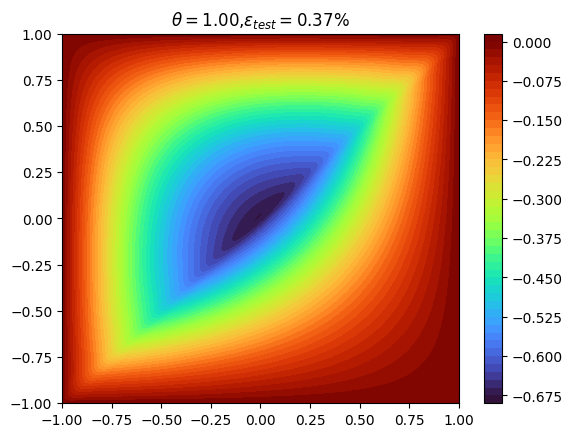

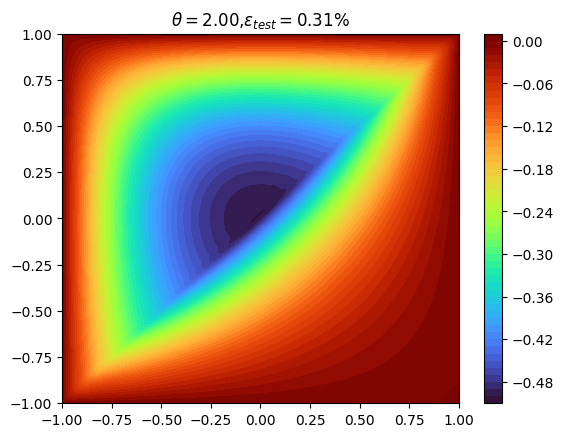

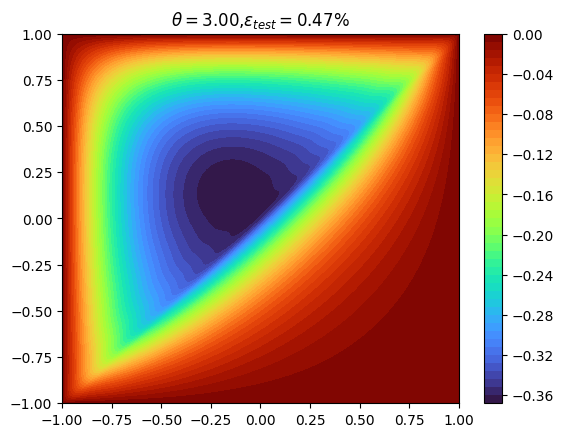

In [5]:
%%time
for t in Theta:
    fig = plt.figure()
    model.G[t].plot(fig = fig)
    error = model.computeEmpiricalError(t)
    plt.title(f"$\\theta = {{{t:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\\%$")

In [6]:
# vmin, vmax = -0.44,2.8
# Gplot = model.G[0.95]

# xx = np.linspace(domain[0],domain[1],2000)
# yy = np.linspace(domain[2],domain[3],2000)
# x, y = np.meshgrid(xx,yy)
# Gplot = Gplot[x,y]

# fig = plt.figure(figsize = (13,10), frameon=False)
# plt.axis('off')
# plt.gca().set_aspect('equal', adjustable='box')
# levels = np.linspace(vmin, vmax, 50, endpoint = True)
# plt.contourf(x,y,Gplot, levels = levels, cmap = 'jet', vmin = vmin, vmax = vmax)
# # ticks = np.linspace(vmin, vmax, 10, endpoint=True)
# # cbar = plt.colorbar(ticks = ticks, modeltion = 0.046, pad = 0.04)

# fig.savefig('model-C.png', dpi = fig.dpi, bbox_inches='tight', pad_inches=0)

In [7]:
%%time
u,s,v = model.G[Theta[0]].svd()

CPU times: user 40.9 s, sys: 83 ms, total: 41 s
Wall time: 19.1 s


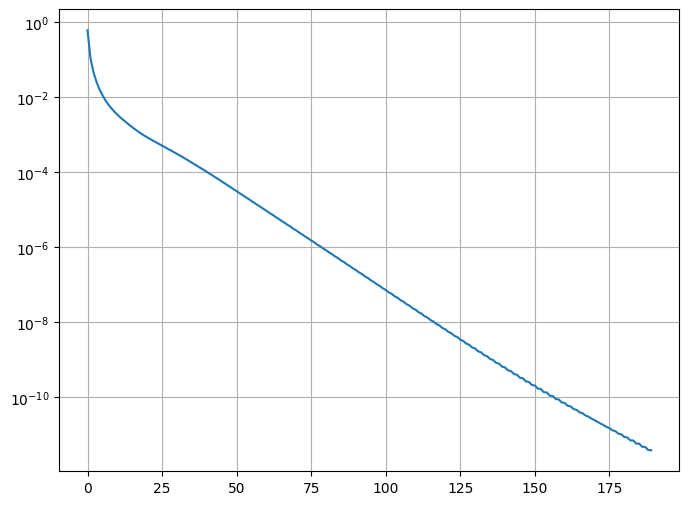

In [8]:
fig = plt.figure(figsize = (8,6))
plt.plot(s)
plt.yscale('log')
plt.grid(True)

(0.0, 1.0)

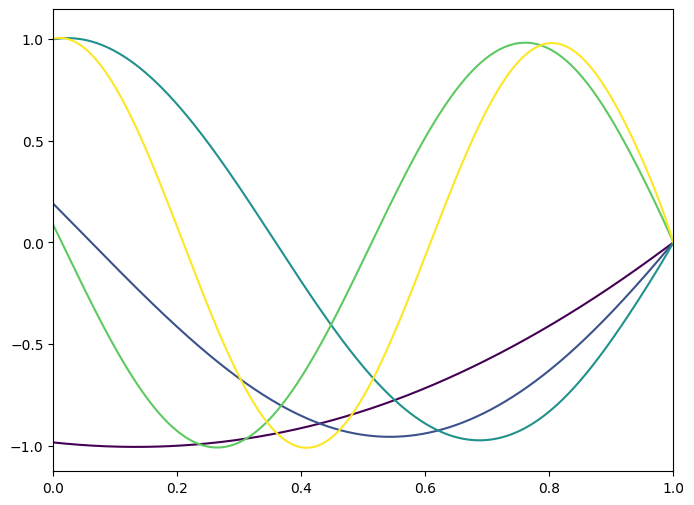

In [9]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [10]:
%%time
Ginterp, Ninterp = model.generateNewModel(theta_)

CPU times: user 4min 14s, sys: 109 ms, total: 4min 14s
Wall time: 1min 53s


In [11]:
validation = ChebGreen([theta_], domain, generateData, script, example, dirichletBC)

Generating dataset for example 'advection_diffusion'


### Example = advection_diffusion @ theta = 2.5 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/100
Step = 58/100
Step = 59/100
Step = 60/100
Step = 61

-------------------------------------------------------------------------------

Generating chebfun2 models:


Training greenlearning model for example 'advection_diffusion' at Theta = 2.50
Training with Adam:


Loss at epoch 100: Training = 1.562E-03, Validation = 1.564E-03


Loss at epoch 200: Training = 4.967E-04, Validation = 6.077E-04


Loss at epoch 300: Training = 7.781E-04, Validation = 5.928E-04


Loss at epoch 400: Training = 1.185E-04, Validation = 1.477E-04


Loss at epoch 500: Training = 8.476E-05, Validation = 1.005E-04


Loss at epoch 600: Training = 6.047E-05, Validation = 6.992E-05


Loss at epoch 700: Training = 4.568E-05, Validation = 5.224E-05


Loss at epoch 800: Training = 3.885E-05, Validation = 4.516E-05


Loss at epoch 900: Training = 3.180E-05, Validation = 3.729E-05


Loss at epoch 1000: Training = 2.686E-05, Validation = 3.135E-05


Loss at epoch 1100: Training = 2.326E-05, Validation = 2.702E-05


Loss at epoch 1200: Training = 2.053E-05, Validation = 2.377E-05


Loss at epoch 1300: Training = 1.836E-05, Validation = 2.125E-05


Loss at epoch 1400: Training = 1.660E-05, Validation = 1.925E-05


Loss at epoch 1500: Training = 1.514E-05, Validation = 1.765E-05


Loss at epoch 1600: Training = 1.393E-05, Validation = 1.639E-05


Loss at epoch 1700: Training = 1.293E-05, Validation = 1.540E-05


Loss at epoch 1800: Training = 1.211E-05, Validation = 1.463E-05


Loss at epoch 1900: Training = 1.142E-05, Validation = 1.401E-05


Loss at epoch 2000: Training = 1.085E-05, Validation = 1.352E-05
Training with LBFGS:


Learning a chebfun model for example 'advection_diffusion' at Theta = 2.50


Chebfun model added for example 'advection_diffusion' at Theta = 2.50



CPU times: user 50.5 s, sys: 8.02 ms, total: 50.5 s
Wall time: 15.7 s


Text(0.5, 1.0, 'Interpolated Model $\\theta = {2.50}$,$\\epsilon_{test} = {0.53}\\%$')

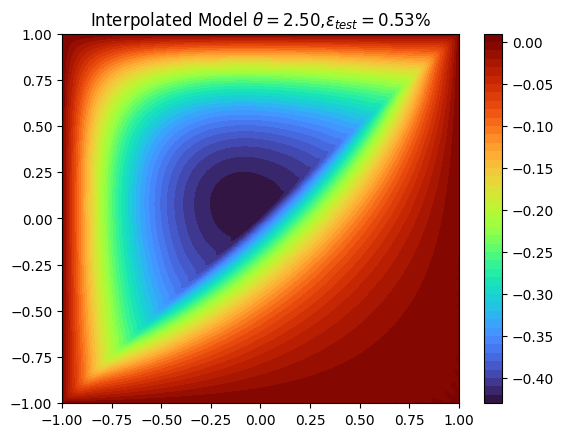

In [12]:
%%time
fig = plt.figure()
Ginterp.plot(fig = fig)
error = model.computeEmpiricalError(theta_)
plt.title(f"Interpolated Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\\%$")

CPU times: user 51.9 s, sys: 12.9 ms, total: 51.9 s
Wall time: 16.8 s


Text(0.5, 1.0, 'Validation Model $\\theta = {2.50}$,$\\epsilon_{test} = {0.27}\\%$')

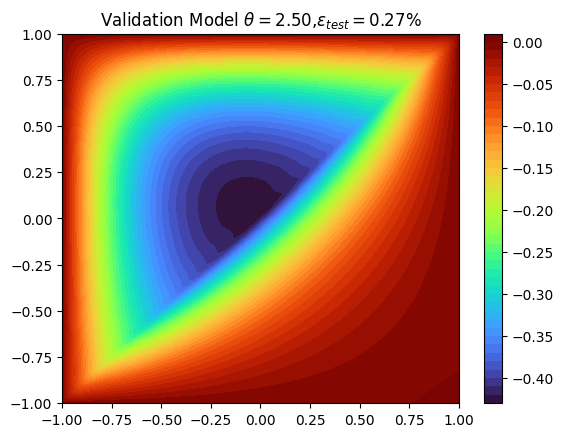

In [13]:
%%time
fig = plt.figure()
validation.G[theta_].plot(fig = fig)
error = validation.computeEmpiricalError(theta_)
plt.title(f"Validation Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\\%$")

In [14]:
def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
    domain = interpModel.domain
    xx = np.linspace(domain[2],domain[3],2000)
    yy = np.linspace(domain[0],domain[1],2000)
    x, s = np.meshgrid(xx,yy)
    
    if vmin is None:
        vmin = min(interpModel.min,exactModel.min)
    if vmax is None:
        vmax = max(interpModel.max,exactModel.max)
        
    plt.figure(figsize = (16,6))
    plt.subplot(121)
    
    GInterp = interpModel[x,s]
    
    levels = np.linspace(vmin, vmax, 50, endpoint = True)
    ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
    surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    plt.gca().set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('$x$', fontsize = 11)
    plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Interpolated", fontsize = 14)
    
    GExact = exactModel[x,s]
    
    plt.subplot(122)
    plt.gca().set_aspect('equal', adjustable='box')
    surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('x', fontsize = 11)
    plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Data", fontsize = 14)

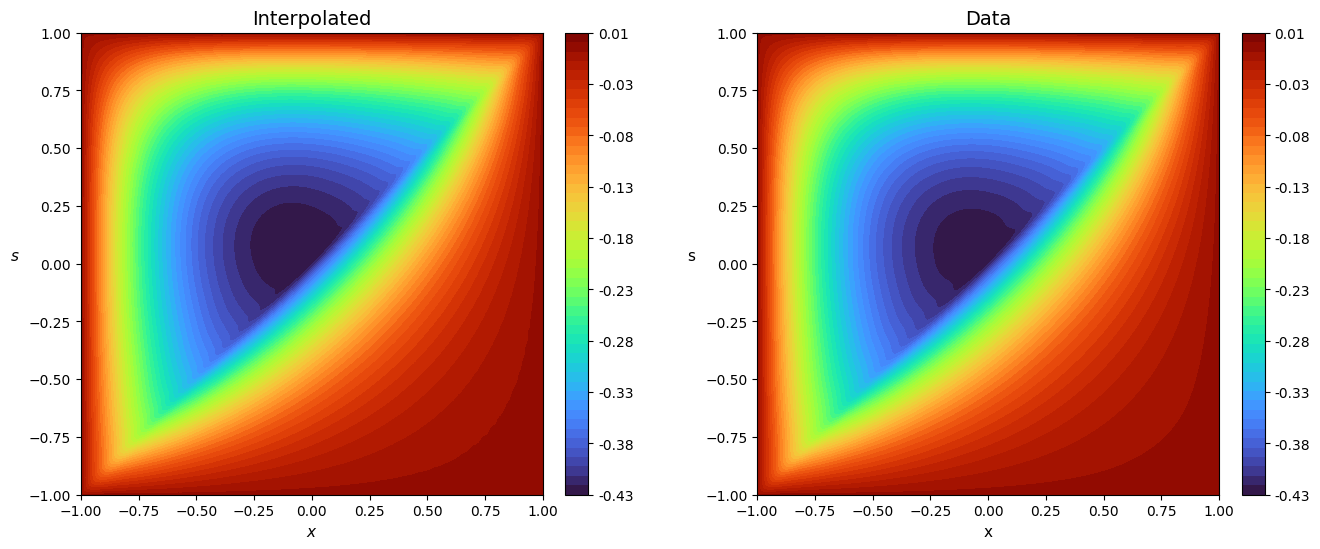

In [15]:
compareGreen1D(Ginterp,validation.G[theta_])